In [3]:
import zipfile
import io
import requests

# data handling
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler

# feature selection
from sklearn.feature_selection import mutual_info_classif

# classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

# performance metrics
from sklearn.metrics import balanced_accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [4]:
# URL of the zip file on GitHub
file_url = "https://github.com/albertegi/Cancer-Classification/blob/main/cancer_gene_expression.zip?raw=true"

# Step 1: Download the zip file
response = requests.get(file_url)
response.raise_for_status()  # Ensure the download was successful

# Step 2: Open the zip file in memory
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    # List files in the zip
    print(z.namelist())
    #extract and read it the csv file directly
    with z.open('cancer_gene_expression.csv') as f:
        dataframe = pd.read_csv(f)

# Now `dataframe` should contain the data from the CSV file
print(dataframe.head())

['cancer_gene_expression.csv']
   gene_1  gene_2  gene_3    gene_4  gene_5  gene_6  gene_7  gene_8    gene_9  \
0     0.0     0.0     0.0  2.088413     0.0     0.0     0.0     0.0  0.550605   
1     0.0     0.0     0.0  3.205955     0.0     0.0     0.0     0.0  0.425244   
2     0.0     0.0     0.0  4.746646     0.0     0.0     0.0     0.0  2.639417   
3     0.0     0.0     0.0  1.173191     0.0     0.0     0.0     0.0  1.527371   
4     0.0     0.0     0.0  1.366532     0.0     0.0     0.0     0.0  0.000000   

    gene_10  ...  gene_7992  gene_7993  gene_7994  gene_7995  gene_7996  \
0  2.815760  ...  11.558803   8.881802   6.014840   6.643534  11.740624   
1  2.354396  ...  11.062829   9.032864   5.054193   6.432320  12.104985   
2  1.657091  ...  12.497640   7.198160   0.943434   7.371690  11.202356   
3  2.732899  ...  11.261713   8.725676   6.300418   6.036451  11.732303   
4  3.388355  ...  12.241965   7.685204   5.142948   6.355788  11.493950   

   gene_7997  gene_7998  gene_7

# Data Exploration & Cleaning

In [5]:
# Check the number of features and samples in the dataset
# The last column contains the target variable
print(dataframe.shape)

(801, 8001)


In [6]:
# Check the first five columns in the dataset
print(dataframe.columns[0:5])

Index(['gene_1', 'gene_2', 'gene_3', 'gene_4', 'gene_5'], dtype='object')


In [7]:
# Check the name of the last column
dataframe.columns[-1]

'Cancer_Type'

In [8]:
#Check for missing values

data_null_values = dataframe.isnull().sum()
null_values = [data_null_value for data_null_value in data_null_values if data_null_value > 0]
print('Colums with missing values:%d'%len(null_values))




Colums with missing values:0


<Axes: ylabel='count'>

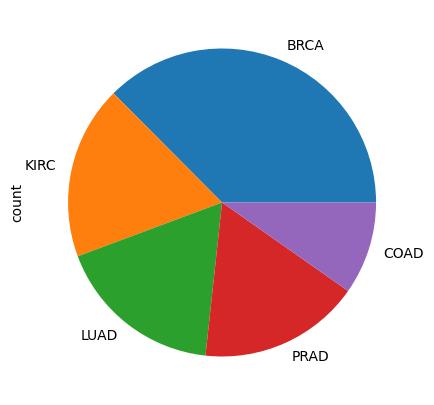

In [18]:
# plot a pie chat chat to display the class distribution

dataframe['Cancer_Type'].value_counts().plot(kind='pie', figsize=(10, 5))

<Axes: xlabel='Cancer_Type'>

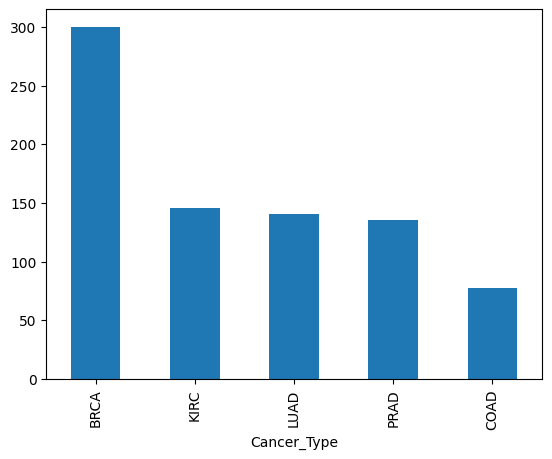

In [16]:
# plot a bar chat chat to display the class distribution

dataframe['Cancer_Type'].value_counts().plot.bar

## Cancer Types
### BRCA - Breast Cancer
### KIRC - Kidney
### LUAD - Lung Cancer
### PRAD - Prostrate Cancer
### COAD - Colon Cancer

# Data preprocessing
### This is to process the data in a suitable format before modelling 

In [19]:
# separate the features from the target variable.

X = dataframe.iloc[:, 0:-1]
y = dataframe.iloc[:,-1]

In [20]:
X.shape

(801, 8000)

In [21]:
y.shape

(801,)